# Convolutional Neural Network (CNN) From Scratch

This notebook demonstrates a full CNN implemented **from first principles** using NumPy.

### What this notebook does:
- Explains CNN concepts step by step
- Uses custom-built layers (no PyTorch / TensorFlow)
- Trains a CNN on sample data
- Visualizes feature maps, filters, and loss curves

### What this notebook does NOT do:
- Reimplement core logic (that lives in `src/`)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Add src folder
sys.path.append(r"C:\Users\ASUS\Desktop\cleaned_DataAnalysis\cnn-from-scratch\src")

from cnn_model import SimpleCNN


## CNN Architecture Used

The CNN follows this pipeline:

Input Image  
→ Convolution  
→ ReLU  
→ Max Pooling  
→ Flatten  
→ Fully Connected  
→ Softmax  
→ Loss

This architecture allows the network to:
- Learn local spatial features
- Reduce dimensionality
- Perform classification


## Input & Shape Flow

- Input shape: (N, C, H, W)
- After convolution: (N, F, OH, OW)
- After pooling: spatial dimensions reduce
- After flattening: 1D feature vector
- Dense layer outputs class scores

Understanding shapes is critical for CNN correctness.


In [3]:
# Dummy dataset for demonstration
X = np.zeros((10, 1, 28, 28))
X[:, :, 10:18, 10:18] = 1.0  # simple square
y = np.zeros(10, dtype=int)


In [4]:
import numpy as np
model = SimpleCNN()


## Forward Pass

During the forward pass:
- Convolution extracts spatial features
- ReLU introduces non-linearity
- Pooling reduces spatial size
- Fully connected layer produces class scores
- Softmax converts scores into probabilities


In [5]:
loss = model.forward(X, y)
print("Initial loss:", loss)


Initial loss: 2.297747305543521


## Backward Pass

Backpropagation computes:
- Gradients of loss w.r.t weights
- Updates filters and dense parameters

This is how CNN learns useful filters automatically.


In [6]:
epochs = 10
losses = []

for epoch in range(epochs):
    loss = model.forward(X, y)
    model.backward()
    losses.append(loss)
    print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f}")


Epoch 1/10 | Loss: 2.2977
Epoch 2/10 | Loss: 2.2848
Epoch 3/10 | Loss: 2.2709
Epoch 4/10 | Loss: 2.2557
Epoch 5/10 | Loss: 2.2388
Epoch 6/10 | Loss: 2.2190
Epoch 7/10 | Loss: 2.1949
Epoch 8/10 | Loss: 2.1644
Epoch 9/10 | Loss: 2.1249
Epoch 10/10 | Loss: 2.0726


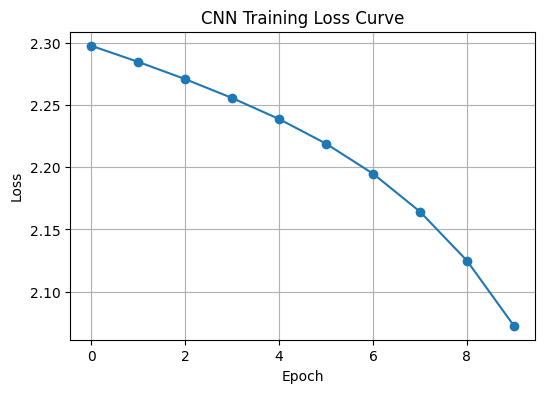

In [7]:
plt.figure(figsize=(6,4))
plt.plot(losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("CNN Training Loss Curve")
plt.grid(True)
plt.show()


## Feature Maps

Feature maps show **what the CNN detects** after convolution.
Early layers usually detect edges and simple patterns.


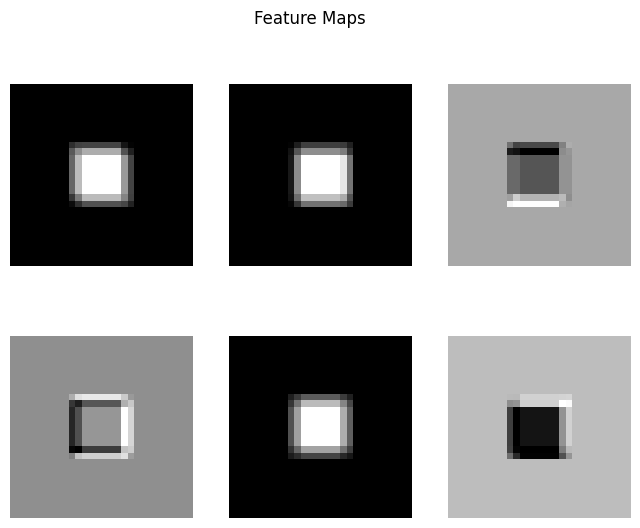

In [8]:
# Visualize feature maps of first image
feature_maps = model.relu.cache[0]  # after conv

plt.figure(figsize=(8,6))
for i in range(min(6, feature_maps.shape[0])):
    plt.subplot(2,3,i+1)
    plt.imshow(feature_maps[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Feature Maps")
plt.show()


## Learned Filters

Visualizing convolution kernels helps us understand
what kind of patterns the network is learning.


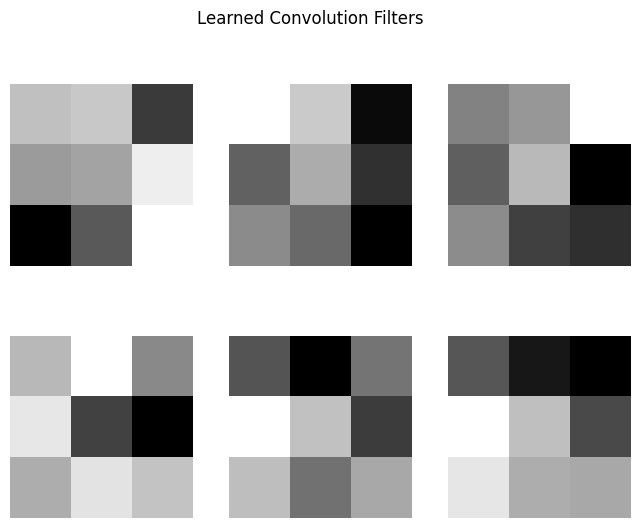

In [9]:
plt.figure(figsize=(8,6))
for i in range(min(6, model.W.shape[0])):
    plt.subplot(2,3,i+1)
    plt.imshow(model.W[i,0], cmap="gray")
    plt.axis("off")
plt.suptitle("Learned Convolution Filters")
plt.show()


## Key Takeaways

- CNNs learn filters automatically via backpropagation
- im2col makes convolution computationally efficient
- Visualizations help demystify deep learning
- Modular code improves clarity and reusability

This project builds a solid foundation for:
- Advanced CNNs
- PyTorch implementations
- Research and production systems


## Next Steps

- Train on real MNIST dataset
- Add more convolution layers
- Use Adam optimizer
- Compare with PyTorch implementation
